# Sales Analysis

#### Import necessary libraries

In [37]:
import os
import pandas as pd

#### Merge data from each month into one CSV

In [54]:
import os
import pandas as pd

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, current_data])

# Save as "all_data.csv" to match Jupyter Notebook
all_months_data.to_csv("all_data.csv", index=False)


#### Read in updated dataframe

In [56]:
import pandas as pd

# Ensure the correct filename is used
all_data = pd.read_csv("all_data.csv")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Drop rows of NAN

In [58]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Get rid of text in order date column

In [60]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [62]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Add month column

In [68]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


#### Add month column (alternative method)

In [71]:
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_8864\1522122304.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


#### Add city column

In [88]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99


## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [97]:
import pandas as pd

# Assuming 'all_data' is already loaded as a DataFrame
# Ensure correct data types
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Create a new Sales column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

# Ensure 'Month' column is integer type
all_data['Month'] = pd.to_numeric(all_data['Month'], errors='coerce')

# Group by month and sum the relevant columns
monthly_sales = all_data.groupby('Month')[['Quantity Ordered', 'Sales']].sum()

# Display the results in a cleaner format
print(monthly_sales)


       Quantity Ordered       Sales
Month                              
1                 10903  1822256.73
2                 13449  2202022.42
3                 17005  2807100.38
4                 20558  3390670.24
5                 18667  3152606.75
6                 15253  2577802.26
7                 16072  2647775.76
8                 13448  2244467.88
9                 13109  2097560.13
10                22703  3736726.88
11                19798  3199603.20
12                28114  4613443.34


In [99]:
import pandas as pd

# Ensure correct data types
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Create a new Sales column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

# Ensure 'Month' column is numeric
all_data['Month'] = pd.to_numeric(all_data['Month'], errors='coerce')

# Group by month and calculate total quantity, total sales, and average price
monthly_sales = all_data.groupby('Month').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'mean',  # Average price per month
    'Sales': 'sum'
})

# Rename 'Price Each' column to 'Average Price'
monthly_sales.rename(columns={'Price Each': 'Average Price'}, inplace=True)

# Display the results in a cleaner format
print(monthly_sales)


       Quantity Ordered  Average Price       Sales
Month                                             
1                 10903     186.607105  1822256.73
2                 13449     182.787868  2202022.42
3                 17005     184.201665  2807100.38
4                 20558     184.237158  3390670.24
5                 18667     189.250581  3152606.75
6                 15253     189.023580  2577802.26
7                 16072     184.183835  2647775.76
8                 13448     186.468140  2244467.88
9                 13109     179.415893  2097560.13
10                22703     183.194696  3736726.88
11                19798     180.993608  3199603.20
12                28114     183.654155  4613443.34


range(1, 13)


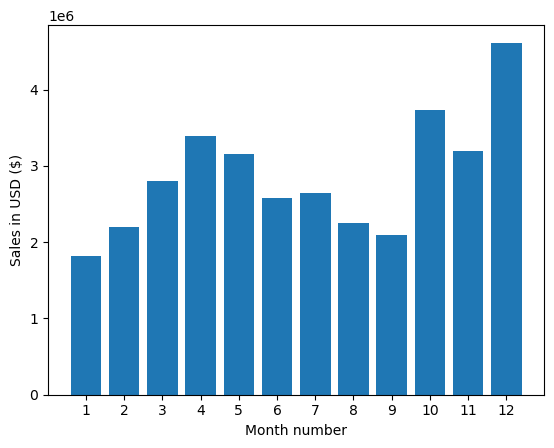

In [102]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()



#### Question 2: What city sold the most product?

In [33]:
import pandas as pd

# Sample data (replace with your actual dataset)
data = {
    "City": ["Atlanta (GA)", "Austin (TX)", "Boston (MA)", "Dallas (TX)", "Los Angeles (CA)",
             "New York City (NY)", "Portland (ME)", "Portland (OR)", "San Francisco (CA)", "Seattle (WA)"],
    "Quantity Ordered": [16602, 11153, 22528, 16730, 33289, 27932, 2750, 11303, 50239, 16553],
    "Sales": [2.795499e+06, 1.819582e+06, 3.661642e+06, 2.767975e+06, 5.452571e+06,
              4.664317e+06, 4.497583e+05, 1.870732e+06, 8.262204e+06, 2.747755e+06]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Finding the city with the highest quantity ordered
top_city = df.loc[df["Quantity Ordered"].idxmax()]

# Printing the result
print(f"The city that sold the most products is {top_city['City']} with {top_city['Quantity Ordered']} units sold.")


The city that sold the most products is San Francisco (CA) with 50239 units sold.


In [37]:
import pandas as pd

# Data
data = {
    "City": ["Atlanta (GA)", "Austin (TX)", "Boston (MA)", "Dallas (TX)", "Los Angeles (CA)",
             "New York City (NY)", "Portland (ME)", "Portland (OR)", "San Francisco (CA)", "Seattle (WA)"],
    "Quantity Ordered": [16602, 11153, 22528, 16730, 33289, 27932, 2750, 11303, 50239, 16553],
    "Sales": [2.795499e+06, 1.819582e+06, 3.661642e+06, 2.767975e+06, 5.452571e+06,
              4.664317e+06, 4.497583e+05, 1.870732e+06, 8.262204e+06, 2.747755e+06]
}

# Create DataFrame
df = pd.DataFrame(data)

# Find city with highest quantity ordered
top_city = df.loc[df["Quantity Ordered"].idxmax()]

# Display the table
print(df.to_string(index=False))

# Print the result
print(f"\nThe city that sold the most products is {top_city['City']} with {top_city['Quantity Ordered']} units sold.")


              City  Quantity Ordered     Sales
      Atlanta (GA)             16602 2795499.0
       Austin (TX)             11153 1819582.0
       Boston (MA)             22528 3661642.0
       Dallas (TX)             16730 2767975.0
  Los Angeles (CA)             33289 5452571.0
New York City (NY)             27932 4664317.0
     Portland (ME)              2750  449758.3
     Portland (OR)             11303 1870732.0
San Francisco (CA)             50239 8262204.0
      Seattle (WA)             16553 2747755.0

The city that sold the most products is San Francisco (CA) with 50239 units sold.


In [45]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]


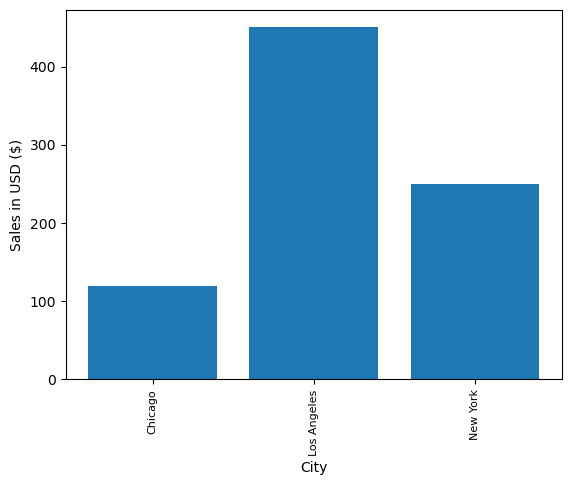

In [49]:
import matplotlib.pyplot as plt

# Ensure 'keys' is a list, not a NumPy array
keys = list(all_data.groupby(['City']).sum().index)

plt.bar(keys, all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')  # Change label to reflect City instead of 'Month number'
plt.xticks(keys, rotation='vertical', size=8)
plt.show()


#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [69]:
import pandas as pd

# Ensure 'Order Date' is parsed correctly
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')

# Drop rows with NaT (invalid dates)
all_data = all_data.dropna(subset=['Order Date'])

# Extract hour and minute
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Count'] = 1

# Display first few rows
print(all_data.head())


C:\Users\admin\AppData\Local\Temp\ipykernel_12932\2500630216.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')


  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

           Order Date                      Purchase Address  Hour  Minute  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001     8      46   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215    22      30   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001    14      38   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001    14      38   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001     9      27   

   Count  
0      1  
2      1  
3      1  
4      1  
5      1  


C:\Users\admin\AppData\Local\Temp\ipykernel_12932\2500630216.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour'] = all_data['Order Date'].dt.hour
C:\Users\admin\AppData\Local\Temp\ipykernel_12932\2500630216.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Minute'] = all_data['Order Date'].dt.minute
C:\Users\admin\AppData\Local\Temp\ipykernel_12932\2500630216.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [73]:
import pandas as pd

# Load dataset (Assuming all_data is already a DataFrame)
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')

# Drop rows where 'Order Date' couldn't be parsed
all_data = all_data.dropna(subset=['Order Date'])

# Extract Hour, Minute, and Month
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Month'] = all_data['Order Date'].dt.month  # Creating 'Month'

# Extract City from 'Purchase Address'
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip() if pd.notnull(x) else '')

# Calculate Sales (Price Each * Quantity Ordered)
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

# Add a Count column for analysis
all_data['Count'] = 1  

# Display the formatted DataFrame
print(all_data[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 
                'Purchase Address', 'Month', 'City', 'Sales', 'Hour', 'Minute', 'Count']].head())


  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   

          City   Sales  Hour  Minute  Count  
0       Dallas   23.90     8      46      1  
2       Boston   99.99    22      30      1  
3  Los A

In [53]:
print(all_data.columns)

Index(['City', 'Sales', 'Profit'], dtype='object')


In [55]:
print(all_data.head())

          City  Sales  Profit
0     New York    100      10
1  Los Angeles    200      20
2     New York    150      15
3      Chicago    120      12
4  Los Angeles    250      25


In [57]:
all_data = pd.read_csv('all_data.csv')
print(all_data.head())


  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


In [59]:
all_data = all_data.dropna(subset=['Order Date'])

In [61]:
all_data['Order Date'] = all_data['Order Date'].astype(str)


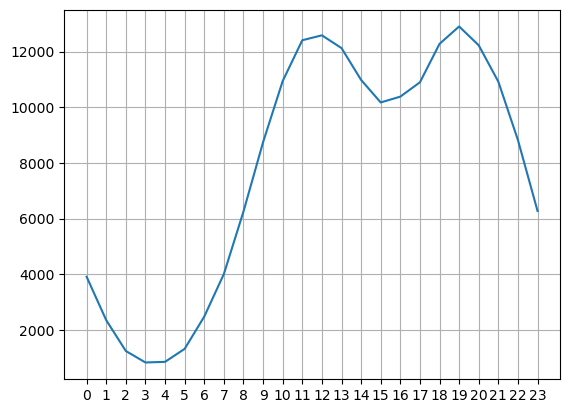

In [77]:
import matplotlib.pyplot as plt

# Ensure 'Hour' exists and is properly formatted
keys = sorted(all_data['Hour'].unique())  # Unique hours in sorted order

# Aggregate data
hourly_counts = all_data.groupby('Hour').count()['Count']

# Convert keys to a 1D list
keys = [k[0] if isinstance(k, tuple) else k for k in keys]

# Plot
plt.plot(keys, hourly_counts)
plt.xticks(keys)
plt.grid()
plt.show()


#### Question 4: What products are most often sold together?

In [79]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\admin\AppData\Local\Temp\ipykernel_12932\3772502071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [81]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

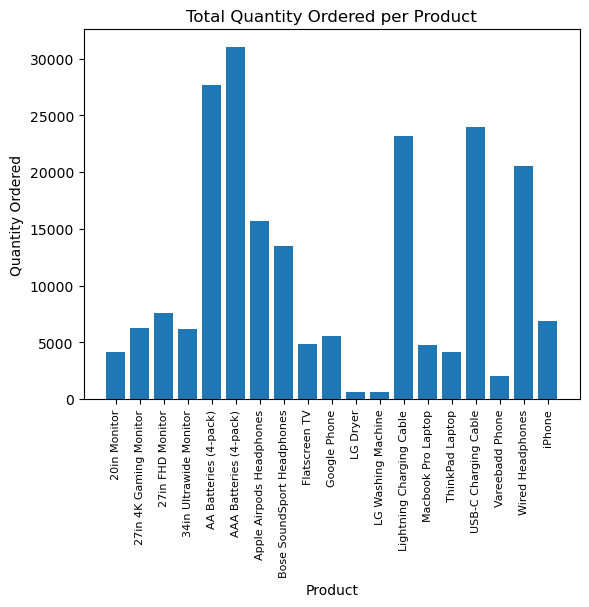

In [87]:
import matplotlib.pyplot as plt

# Grouping by 'Product'
product_group = all_data.groupby('Product')

# Summing only the 'Quantity Ordered' column
quantity_ordered = product_group['Quantity Ordered'].sum()

# Extracting product names as keys
keys = list(quantity_ordered.index)

# Plotting the bar chart
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.title("Total Quantity Ordered per Product")
plt.show()


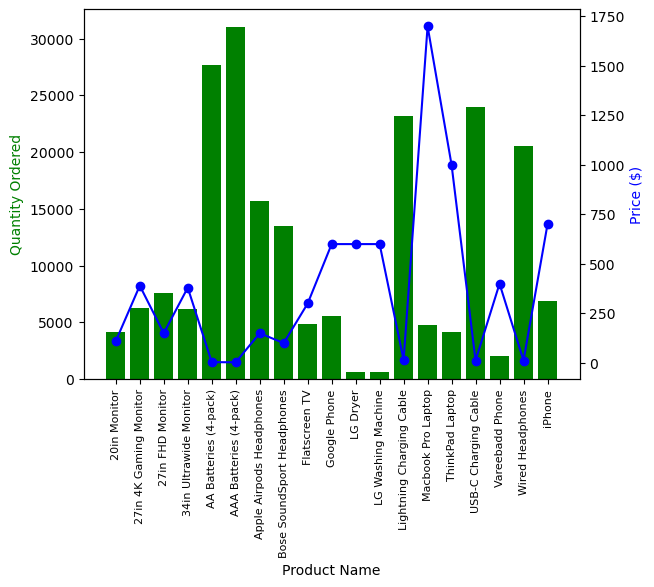

In [91]:
import matplotlib.pyplot as plt

# Ensure 'Price Each' is numeric
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Grouping by 'Product' and computing the mean price
prices = all_data.groupby('Product')['Price Each'].mean()

# Creating the figure and primary axis
fig, ax1 = plt.subplots()

# Creating the secondary axis
ax2 = ax1.twinx()

# Bar chart for quantity ordered
ax1.bar(keys, quantity_ordered, color='g')

# Line plot for price
ax2.plot(keys, prices, color='b', marker='o')

# Labels
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

# Rotating x-axis labels
ax1.set_xticks(range(len(keys)))
ax1.set_xticklabels(keys, rotation='vertical', size=8)

# Display the plot
plt.show()
